In [1]:
from __future__ import division
from math import *
import numpy as np
import sys
import os
from matplotlib.ticker import LogFormatter
from matplotlib.ticker import LogFormatterExponent
from matplotlib.ticker import LogFormatterSciNotation

import pandas as pd
import numpy as np
import matplotlib, os
import matplotlib.pyplot as plt
# Matplotlib configuration
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.style.use('classic')
plt.rcParams['xtick.direction']     = 'in'
plt.rcParams['ytick.direction']     = 'in'
plt.rcParams['xtick.top']           = True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.right']         = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import matplotlib.cm as cm

from matplotlib import pyplot
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family' : "sans-serif"})
params= {'text.latex.preamble' : [r'\usepackage{amssymb}']}
pyplot.rcParams.update(params)

from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import FuncFormatter
from scipy.interpolate import griddata
from scipy.interpolate import interp1d

import sys
sys.path.append("/Users/oozdal/packages/ma5-histo")
sys.path.append("/Users/oozdal/packages/ma5_expert")

import src.SafReader as sr
from CutFlowReader import Collection 

In [2]:
def df(fileLoc):
    data = sr.read(fileLoc=fileLoc)
    floatCols=['binMin', 'binMax', 'value']
    data[floatCols]  = data[floatCols].apply(pd.to_numeric, errors='coerce')
    data["bin"]      = (data.binMin+data.binMax)/2
    data             = data[data.binMax != np.inf]
    data             = data[data.binMin != -1*np.inf]
    data["binlabel"] = (data.binMin+data.binMax)/2
    return data

In [3]:
def unc(observable, Nevt):
    return np.sqrt((1-observable**2)/Nevt)

In [4]:
lumi=3000.

# Standard Model (SM)

In [98]:
AC_data = '/Users/oozdal/projects/SSM_WpZp/AC_data'

SM = Collection(collection_path    = AC_data+'/SMlepneut_LO/MadAnalysis5job_0/Cutflows',
                    saf_file       = AC_data+'/SMlepneut_LO/SMlepneut_LO.saf', 
                    lumi           = 3000.)

#SM_2 = Collection(collection_path  = AC_data+'/SMlepneut_LO_2/MadAnalysis5job_0/Cutflows',
#                    saf_file       = AC_data+'/SMlepneut_LO_2/SMlepneut_LO_2.saf', 
#                    lumi           = 3000.)

SM_3 = Collection(collection_path  = AC_data+'/SMlepneut_LO_3/MadAnalysis5job_0/Cutflows',
                    saf_file       = AC_data+'/SMlepneut_LO_3/SMlepneut_LO_3.saf', 
                    lumi           = 3000.)

SM_4 = Collection(collection_path  = AC_data+'/SMlepneut_LO_4/MadAnalysis5job_0/Cutflows',
                    saf_file       = AC_data+'/SMlepneut_LO_4/SMlepneut_LO_4.saf', 
                    lumi           = 3000.)

#SM_totxsec = (SM.xsec*9000000 + SM_2.xsec*2000000) / (9000000 + 2000000)
#SM_sumw   = SM['SR_Lepton'][0].sumw + SM_2['SR_Lepton'][0].sumw

SM_totxsec = (SM.xsec*9000000 + SM_3.xsec*5000000 + SM_4.xsec*6000000) / (9000000 + 5000000 + 6000000)
SM_sumw   = SM['SR_Lepton'][0].sumw + SM_3['SR_Lepton'][0].sumw + SM_4['SR_Lepton'][0].sumw

#SM_totxsec = (SM.xsec)
#SM_sumw   = SM['SR_Lepton'][0].sumw

print(SM_sumw)
print(SM_totxsec)

1272457.672
0.0636228835902


In [99]:
ACdata = '/Users/oozdal/projects/SSM_WpZp/AC_data/'
all_filenames = ["SMlepneut_LO.csv","SMlepneut_LO_3.csv","SMlepneut_LO_4.csv"] # "SMlepneut_LO_2.csv",
SM_df = pd.concat([pd.read_csv(ACdata+f, header=0, sep=",") for f in all_filenames ])
SM_df.columns = ["MET", "MTMiss", "Eta", "Lepton_PT", "Lepton_ID", "BoostedLep_Eta", "EvWeight"]
print(min(SM_df["MTMiss"]))
print(max(SM_df["MTMiss"]))
SM_df.head(5)

500.0
6999.99


,MET,MTMiss,Eta,Lepton_PT,Lepton_ID,BoostedLep_Eta,EvWeight
0,3260.08,6520.17,-0.171688,3260.08,-13,-0.085844,0.000004
1,2142.52,4285.04,0.325315,2142.52,-11,0.162658,0.000004
2,2102.22,4204.45,-0.916293,2102.22,-11,-0.458146,0.000004
3,2387.69,4775.38,0.046829,2387.69,-11,0.023415,0.000004
4,3063.63,6127.26,0.572951,3063.63,-13,0.286476,0.000004


In [100]:
# Applt Eta < 2.5
SM_df = SM_df[:][(abs(SM_df["Eta"])<=2.5)]    # Eta(lepton) < 2.5 

# Apply PT > 25 GeV
SM_df = SM_df[:][(SM_df["Lepton_PT"]>=25)]

SM_df = SM_df[:][(SM_df["MTMiss"]>500) ] # & (SM_df["MET"]>0) & (SM_df["Lepton_PT"]>0)

SM_df.head(5)

,MET,MTMiss,Eta,Lepton_PT,Lepton_ID,BoostedLep_Eta,EvWeight
0,3260.08,6520.17,-0.171688,3260.08,-13,-0.085844,0.000004
1,2142.52,4285.04,0.325315,2142.52,-11,0.162658,0.000004
2,2102.22,4204.45,-0.916293,2102.22,-11,-0.458146,0.000004
3,2387.69,4775.38,0.046829,2387.69,-11,0.023415,0.000004
4,3063.63,6127.26,0.572951,3063.63,-13,0.286476,0.000004


# True AC Components for the Standard Model

In [101]:
SM_AC_pos = SM_df[ (SM_df["Lepton_ID"] < 0.) ]      # Positively charged leptons (-11,-13)
SM_AC_neg = SM_df[ (SM_df["Lepton_ID"] > 0.) ]      # Negatively charged leptons (11,13)

BinNumber = 26
BinFirst  = 500.
BinLast   = 7000.

StepSize = (BinLast - BinFirst)/BinNumber
bins = []
bins.append(BinFirst)

for i in range(BinNumber): 
    BinFirst = BinFirst + StepSize
    bins.append(BinFirst)

bins = [500.0, 750.0, 1000.0, 1250.0, 1500.0, 1750.0, 2000.0, 2500.0, 3000.0, 3500.0, 4000.0, 7000.0]     
    
TotEvWeight_LepPos_List1 = []
TotEvWeight_LepNeg_List1 = []

TotEvWeight_LepPos_List2 = []
TotEvWeight_LepNeg_List2 = []

i=0
for i in range(len(bins)-1):
    Box_LepPos = SM_AC_pos[:][ (SM_AC_pos["MTMiss"]>bins[i]) & (SM_AC_pos["MTMiss"]<=bins[i+1]) ]
    TotEvWeight_LepPos = len(Box_LepPos["EvWeight"])
    TotEvWeight_LepPos_List1.append(TotEvWeight_LepPos)
    TotEvWeight_LepPos = sum(Box_LepPos["EvWeight"])
    TotEvWeight_LepPos_List2.append(TotEvWeight_LepPos)
       
    Box_LepNeg = SM_AC_neg[:][ (SM_AC_neg["MTMiss"]>bins[i]) & (SM_AC_neg["MTMiss"]<=bins[i+1]) ]
    TotEvWeight_LepNeg = len(Box_LepNeg["EvWeight"])
    TotEvWeight_LepNeg_List1.append(TotEvWeight_LepNeg)
    TotEvWeight_LepNeg = sum(Box_LepNeg["EvWeight"])
    TotEvWeight_LepNeg_List2.append(TotEvWeight_LepNeg)       
    
TotEvWeight_LepPos_Arr1 = np.array(TotEvWeight_LepPos_List1)
TotEvWeight_LepNeg_Arr1 = np.array(TotEvWeight_LepNeg_List1)

TotEvWeight_LepPos_Arr2 = np.array(TotEvWeight_LepPos_List2)
TotEvWeight_LepNeg_Arr2 = np.array(TotEvWeight_LepNeg_List2)

AC_num = TotEvWeight_LepPos_Arr1 - TotEvWeight_LepNeg_Arr1
AC_den = TotEvWeight_LepPos_Arr1 + TotEvWeight_LepNeg_Arr1

AC_SM     = AC_num/np.where(AC_den==0,1e10,AC_den)
print(AC_SM)

SM_totsumw = sum(TotEvWeight_LepPos_Arr2)+sum(TotEvWeight_LepNeg_Arr2)

#Number of Events
NumofEvents_LepPos_SM = TotEvWeight_LepPos_Arr2*lumi*SM_totxsec*1000/SM_sumw
NumofEvents_LepNeg_SM = TotEvWeight_LepNeg_Arr2*lumi*SM_totxsec*1000/SM_sumw

[0.31833255 0.36869581 0.41219368 0.45260748 0.50371961 0.52347097
 0.58116711 0.60296112 0.63949351 0.66828132 0.77206623]


# LRSM (Case: Gluion Is Jet)

In [27]:
AC_Outputs = '/Users/oozdal/projects/EffWR_Asymmetry/AC_Outputs'

LRSM = Collection(collection_path = AC_Outputs+'/EffWRtolljj_NLO_gluisjet/MadAnalysis5job_0/Cutflows',
                    xsection      = 7.071785e-04,
                    lumi          = 3000.)
LRSM_sumw   = LRSM['SR_Lepton'][0].sumw

In [37]:
AC_data = '/Users/oozdal/projects/EffWR_Asymmetry/AC_data/'
all_filenames = ["EffWRtolljj_NLO_gluisjet.csv"]
LRSM_df = pd.concat([pd.read_csv(AC_data+f, header=0, sep=",") for f in all_filenames ])
LRSM_df.columns = ["MET", "MTMiss", "Eta", "Lepton_PT", "Lepton_ID", "BoostedLep_Eta", "EvWeight"]
print(min(LRSM_df["MTMiss"]))
print(max(LRSM_df["MTMiss"]))
LRSM_df.head(5)

0.00156489
1750.08


,MET,MTMiss,Eta,Lepton_PT,Lepton_ID,BoostedLep_Eta,EvWeight
0,0.000037,0.101705,0.418023,159.369,-11,0.418163,7.762460e-09
1,0.000014,0.112046,-0.404520,237.899,-11,-0.404490,-7.762460e-09
2,0.000010,0.132274,0.734141,256.747,-11,0.734052,7.762460e-09
3,0.000013,0.085995,-0.426217,315.930,11,-0.426307,7.762460e-09
4,0.000003,0.255636,0.000838,544.272,-11,-999.000000,7.762460e-09


Let's apply some bounds

In [38]:
# Applt Eta < 2.5
LRSM_df = LRSM_df[:][(abs(LRSM_df["Eta"])<=2.5)]    # Eta(lepton) < 2.5 

# Apply PT > 25 GeV
LRSM_df = LRSM_df[:][(LRSM_df["Lepton_PT"]>=25)]

# True AC Components for LRSM (Case: Gluon Is Jet)

In [39]:
LRSM_AC_pos = LRSM_df[ (LRSM_df["Lepton_ID"] < 0.) ]  # Positively charged leptons (-11,-13)
LRSM_AC_neg = LRSM_df[ (LRSM_df["Lepton_ID"] > 0.) ]  # Negatively charged leptons (11,13)

BinNumber = 26
BinFirst  = 500.
BinLast   = 7000.

StepSize = (BinLast - BinFirst)/BinNumber
bins = []
bins.append(BinFirst)

for i in range(BinNumber): 
    BinFirst = BinFirst + StepSize
    bins.append(BinFirst)

bins = [0.0, 250.0, 500.0, 750.0, 1000.0, 1250.0, 1500.0, 1750.0] # For MT    
#bins = [0.0, 250.0, 500.0, 1750.0] # For AC    
    
TotEvWeight_LepPos_List1 = []
TotEvWeight_LepNeg_List1 = []

TotEvWeight_LepPos_List2 = []
TotEvWeight_LepNeg_List2 = []

i=0
for i in range(len(bins)-1):
    Box_LepPos = LRSM_AC_pos[:][ (LRSM_AC_pos["MTMiss"]>bins[i]) & (LRSM_AC_pos["MTMiss"]<=bins[i+1]) ]
    TotEvWeight_LepPos = len(Box_LepPos["EvWeight"])
    TotEvWeight_LepPos_List1.append(TotEvWeight_LepPos)
    TotEvWeight_LepPos = sum(Box_LepPos["EvWeight"])
    TotEvWeight_LepPos_List2.append(TotEvWeight_LepPos)
       
    Box_LepNeg = LRSM_AC_neg[:][ (LRSM_AC_neg["MTMiss"]>bins[i]) & (LRSM_AC_neg["MTMiss"]<=bins[i+1]) ]
    TotEvWeight_LepNeg = len(Box_LepNeg["EvWeight"])
    TotEvWeight_LepNeg_List1.append(TotEvWeight_LepNeg)
    TotEvWeight_LepNeg = sum(Box_LepNeg["EvWeight"])
    TotEvWeight_LepNeg_List2.append(TotEvWeight_LepNeg)       
    
TotEvWeight_LepPos_Arr1 = np.array(TotEvWeight_LepPos_List1)
TotEvWeight_LepNeg_Arr1 = np.array(TotEvWeight_LepNeg_List1)

TotEvWeight_LepPos_Arr2 = np.array(TotEvWeight_LepPos_List2)
TotEvWeight_LepNeg_Arr2 = np.array(TotEvWeight_LepNeg_List2)

AC_num = TotEvWeight_LepPos_Arr1 - TotEvWeight_LepNeg_Arr1
AC_den = TotEvWeight_LepPos_Arr1 + TotEvWeight_LepNeg_Arr1

AC_LRSM     = AC_num/np.where(AC_den==0,1e10,AC_den)
print(AC_LRSM)

LRSM_totsumw = sum(TotEvWeight_LepPos_Arr2)+sum(TotEvWeight_LepNeg_Arr2)

#Number of Events
NumofEvents_LepPos_LRSM = TotEvWeight_LepPos_Arr2*lumi*LRSM.xsec*1000/LRSM_sumw
NumofEvents_LepNeg_LRSM = TotEvWeight_LepNeg_Arr2*lumi*LRSM.xsec*1000/LRSM_sumw

print(NumofEvents_LepPos_LRSM + NumofEvents_LepNeg_LRSM)

[ 0.56287835  0.51858407  0.31543624  0.29281768  0.18367347 -0.125
  0.33333333]
[6.02235906e+01 1.64727756e+00 3.06914074e-01 7.40509690e-02
 1.62968076e-02 6.52229934e-03 1.39783709e-03]


# Additional SU(2)L

In [13]:
AC_data = '/Users/oozdal/projects/SSM_WpZp/AC_data'

AddSU2L = Collection(collection_path= AC_data+'/AddSU2L_lepneut_LO/MadAnalysis5job_0/Cutflows',
                    saf_file       = AC_data+'/AddSU2L_lepneut_LO/AddSU2L_lepneut_LO.saf',
                    lumi           = 3000.)

AddSU2L_2 = Collection(collection_path= AC_data+'/AddSU2L_lepneut_LO_2/MadAnalysis5job_0/Cutflows',
                    saf_file       = AC_data+'/AddSU2L_lepneut_LO_2/AddSU2L_lepneut_LO_2.saf',
                    lumi           = 3000.)

AddSU2L_3 = Collection(collection_path= AC_data+'/AddSU2L_lepneut_LO_3/MadAnalysis5job_0/Cutflows',
                    saf_file       = AC_data+'/AddSU2L_lepneut_LO_3/AddSU2L_lepneut_LO_3.saf',
                    lumi           = 3000.)

AddSU2L_4 = Collection(collection_path= AC_data+'/AddSU2L_lepneut_LO_4/MadAnalysis5job_0/Cutflows',
                    saf_file       = AC_data+'/AddSU2L_lepneut_LO_4/AddSU2L_lepneut_LO_4.saf',
                    lumi           = 3000.)

AddSU2L_totxsec = (AddSU2L.xsec*5000000 + AddSU2L_2.xsec*6000000 + AddSU2L_3.xsec*5000000 + AddSU2L_4.xsec*6000000) / (5000000 + 6000000 + 5000000 + 6000000)

AddSU2L_sumw   = AddSU2L['SR_Lepton'][0].sumw + AddSU2L_2['SR_Lepton'][0].sumw + AddSU2L_3['SR_Lepton'][0].sumw + AddSU2L_4['SR_Lepton'][0].sumw
print(AddSU2L_sumw)
print(AddSU2L.xsec)

1273542.6416
7.209786e-05


In [14]:
ACdata = '/Users/oozdal/projects/SSM_WpZp/AC_data/'
all_filenames = ["AddSU2L_lepneut_LO.csv","AddSU2L_lepneut_LO_2.csv","AddSU2L_lepneut_LO_3.csv", "AddSU2L_lepneut_LO_4.csv"]
AddSU2L_df = pd.concat([pd.read_csv(ACdata+f, header=0, sep=",") for f in all_filenames ])
AddSU2L_df.columns = ["MET", "MTMiss", "Eta", "Lepton_PT", "Lepton_ID", "BoostedLep_Eta", "EvWeight"]
print(min(AddSU2L_df["MTMiss"]))
print(max(AddSU2L_df["MTMiss"]))
AddSU2L_df.head(5)

500.0
6999.99


,MET,MTMiss,Eta,Lepton_PT,Lepton_ID,BoostedLep_Eta,EvWeight
0,3155.51,6311.02,-0.528542,3155.51,-11,-0.264271,0.000073
1,2011.27,4022.55,-0.868067,2011.27,11,-0.434033,0.000073
2,2578.55,5157.10,-0.015861,2578.55,-13,-0.007931,0.000073
3,3156.87,6313.73,-0.199463,3156.87,-11,-0.099731,0.000073
4,2576.99,5153.98,-0.744585,2576.99,-11,-0.372293,0.000073


In [15]:
# Applt Eta < 2.5
AddSU2L_df = AddSU2L_df[:][(abs(AddSU2L_df["Eta"])<=2.5)]    # Eta(lepton) < 2.5 

# Apply PT > 25 GeV
AddSU2L_df = AddSU2L_df[:][(AddSU2L_df["Lepton_PT"]>=25)]

AddSU2L_df = AddSU2L_df[:][(AddSU2L_df["MTMiss"]>500) ] # & (AddSU2L_df["MET"]>2000) & (AddSU2L_df["Lepton_PT"]>2000) 

# True AC Components for Additional SU(2)L

In [16]:
AddSU2L_AC_pos = AddSU2L_df[ (AddSU2L_df["Lepton_ID"] < 0.) ]  # Positively charged leptons (-11,-13)
AddSU2L_AC_neg = AddSU2L_df[ (AddSU2L_df["Lepton_ID"] > 0.) ]  # Negatively charged leptons (11,13)

BinNumber = 26
BinFirst  = 500.
BinLast   = 7000.

StepSize = (BinLast - BinFirst)/BinNumber
bins = []
bins.append(BinFirst)

for i in range(BinNumber): 
    BinFirst = BinFirst + StepSize
    bins.append(BinFirst)

bins = [500.0, 750.0, 1000.0, 1250.0, 1500.0, 1750.0, 2000.0, 2500.0, 3000.0, 3500.0, 4000.0, 7000.0]
    
TotEvWeight_LepPos_List1 = []
TotEvWeight_LepNeg_List1 = []

TotEvWeight_LepPos_List2 = []
TotEvWeight_LepNeg_List2 = []


i=0
for i in range(len(bins)-1):
    Box_LepPos = AddSU2L_AC_pos[:][ (AddSU2L_AC_pos["MTMiss"]>bins[i]) & (AddSU2L_AC_pos["MTMiss"]<=bins[i+1]) ]
    TotEvWeight_LepPos = len(Box_LepPos["EvWeight"])
    TotEvWeight_LepPos_List1.append(TotEvWeight_LepPos)
    TotEvWeight_LepPos = sum(Box_LepPos["EvWeight"])
    TotEvWeight_LepPos_List2.append(TotEvWeight_LepPos)
       
    Box_LepNeg = AddSU2L_AC_neg[:][ (AddSU2L_AC_neg["MTMiss"]>bins[i]) & (AddSU2L_AC_neg["MTMiss"]<=bins[i+1]) ]
    TotEvWeight_LepNeg = len(Box_LepNeg["EvWeight"])
    TotEvWeight_LepNeg_List1.append(TotEvWeight_LepNeg)
    TotEvWeight_LepNeg = sum(Box_LepNeg["EvWeight"])
    TotEvWeight_LepNeg_List2.append(TotEvWeight_LepNeg)       
    
TotEvWeight_LepPos_Arr1 = np.array(TotEvWeight_LepPos_List1)
TotEvWeight_LepNeg_Arr1 = np.array(TotEvWeight_LepNeg_List1)

TotEvWeight_LepPos_Arr2 = np.array(TotEvWeight_LepPos_List2)
TotEvWeight_LepNeg_Arr2 = np.array(TotEvWeight_LepNeg_List2)

AC_num = TotEvWeight_LepPos_Arr1 - TotEvWeight_LepNeg_Arr1
AC_den = TotEvWeight_LepPos_Arr1 + TotEvWeight_LepNeg_Arr1

AC_AddSU2L     = AC_num/np.where(AC_den==0,1e10,AC_den)
print(AC_AddSU2L)

AddSU2L_totsumw = sum(TotEvWeight_LepPos_Arr2)+sum(TotEvWeight_LepNeg_Arr2)

#Number of Events
NumofEvents_LepPos_AddSU2L = TotEvWeight_LepPos_Arr2*lumi*AddSU2L_totxsec*1000/(AddSU2L_sumw)
NumofEvents_LepNeg_AddSU2L = TotEvWeight_LepNeg_Arr2*lumi*AddSU2L_totxsec*1000/(AddSU2L_sumw)

[0.31872231 0.36801733 0.41258994 0.46017673 0.5004529  0.51510929
 0.58365833 0.61128248 0.66126805 0.70973464 0.77028374]


# AC Plotting

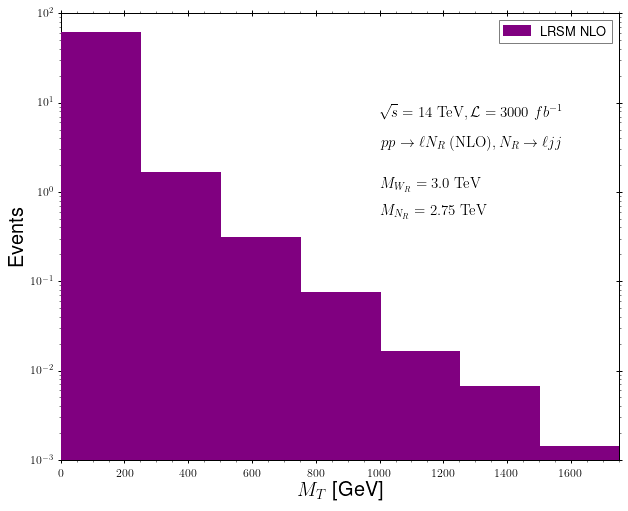

In [46]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
#fig.suptitle(r'No $y_{\ell \ell}$ Cut', fontsize=40)

BinNumber = 26
BinFirst  = 500.
BinLast   = 7000.

StepSize = (BinLast - BinFirst)/BinNumber
bins = []
bins.append(BinFirst)

for i in range(BinNumber): 
    BinFirst = BinFirst + StepSize
    bins.append(BinFirst)

bins = [0.0, 250.0, 500.0, 750.0, 1000.0, 1250.0, 1500.0, 1750.0] # For MT    
#bins = [0.0, 250.0, 500.0, 1750.0] # For AC     
    
binlabel = []
i=0
for i in range(len(bins)-1):
    binlabel.append((bins[i]+bins[i+1])/2.)


fig, ax1 = plt.subplots()
fig.set_facecolor('white')
#plt.title(r"$E_6 - \psi$ Model", fontsize=20)

#plt.hist(binlabel,bins=bins,
#             label=r'$W^+ \to \ell^+ \nu$ @LO', histtype="stepfilled", rwidth=1.0,
#             weights=NumofEvents_LepPos_SM, facecolor="orange",
#             color=None, edgecolor='orange', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2)
#plt.hist(binlabel,bins=bins,
#             label=r'$W^- \to \ell^- \nu$ @LO', histtype="stepfilled", rwidth=1.0,
#             weights=NumofEvents_LepNeg_SM, facecolor="purple",
#             color=None, edgecolor='purple', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=3)
#plt.hist(binlabel,bins=bins,
#             label=r'$W \to \ell \nu$ @LO', histtype="stepfilled", rwidth=1.0,
#             weights=NumofEvents_LepPos_SM+NumofEvents_LepNeg_SM, facecolor="darkgoldenrod",
#             color=None, edgecolor='darkgoldenrod', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=1)


#plt.hist(binlabel,bins=bins,
#             label=r'$W^+ \to \ell^+ \nu$ @LO', histtype="step", rwidth=1.0,
#             weights=NumofEvents_LepPos_LRSM, facecolor="orange",
#             color=None, edgecolor='orange', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=6)
#plt.hist(binlabel,bins=bins,
#             label=r'$W^- \to \ell^- \nu$ @LO', histtype="step", rwidth=1.0,
#             weights=NumofEvents_LepNeg_LRSM, facecolor="darkgoldenrod",
#             color=None, edgecolor='darkgoldenrod', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=7)
plt.hist(binlabel,bins=bins,
             label=r'LRSM NLO', histtype="stepfilled", rwidth=1.0,
             weights=NumofEvents_LepPos_LRSM+NumofEvents_LepNeg_LRSM, facecolor="purple",
             color=None, edgecolor='purple', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=5)

#plt.hist(binlabel,bins=bins,
#             label=r'Additional $SU(2)_L$ $M_{W^\prime}=$ 6.5 TeV', histtype="step", rwidth=1.0,
#             weights=(NumofEvents_LepPos_AddSU2L+NumofEvents_LepNeg_AddSU2L), facecolor="tab:blue",
#             color=None, edgecolor='tab:blue', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=4)


plt.xlabel(r' $M_{T}$ [GeV] ', fontsize=20)
plt.ylabel('Events' , fontsize=20)
#plt.xscale('log')
plt.yscale('log')

ax1.text(1000, 7, r"$\displaystyle \sqrt{s} = 14 {\rm\ TeV}, \mathcal{L} = 3000\ fb^{-1}$", size=15)
ax1.text(1000, 3, r"$\displaystyle pp \to \ell N_R {\rm\ (NLO)}, N_R \to \ell jj$", size=15)
ax1.text(1000, 1, r"$\displaystyle M_{W_R} = 3.0 {\rm\ TeV}$", size=15)
ax1.text(1000, 5e-1, r"$\displaystyle M_{N_R} = 2.75 {\rm\ TeV}$", size=15)

leg = ax1.legend(loc='upper right',fontsize=13) #,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
#leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax1.set_xlim([min(bins),max(bins)])
#ax1.set_ylim([1e-1,1e6])
ax1.tick_params(axis="x", direction="inout", length=6, width=1, color="black",zorder=100)
ax1.tick_params(axis="y", direction="inout", length=6, width=1, color="black",zorder=100)
ax1.tick_params(which="minor", axis="x", direction="out")
ax1.tick_params(which="minor", axis="y", direction="out")
#fig.savefig('/Users/oozdal/Dropbox/WpZp_Project/Second_Paper_WR_bosons/EventsvsMT.png')
plt.show()

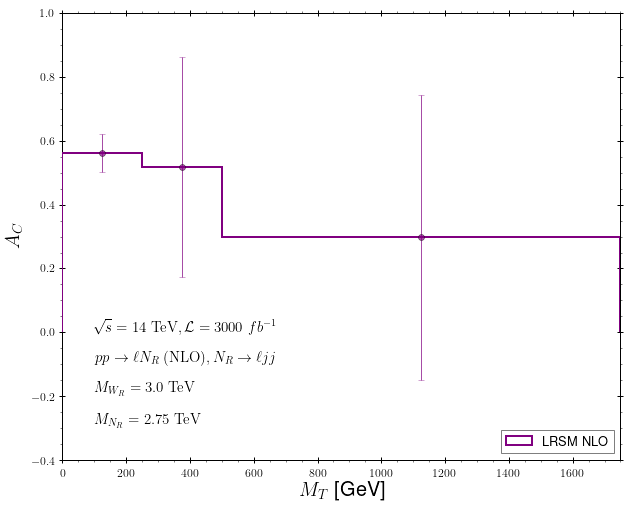

In [36]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
#fig.suptitle(r'No $y_{\ell \ell}$ Cut', fontsize=40)

BinNumber = 26
BinFirst  = 500.
BinLast   = 7000.

StepSize = (BinLast - BinFirst)/BinNumber
bins = []
bins.append(BinFirst)

for i in range(BinNumber): 
    BinFirst = BinFirst + StepSize
    bins.append(BinFirst)

#bins = [0.0, 250.0, 500.0, 750.0, 1000.0, 1250.0, 1500.0, 1750.0] # For MT    
bins = [0.0, 250.0, 500.0, 1750.0] # For AC

binlabel = []
i=0
for i in range(len(bins)-1):
    binlabel.append((bins[i]+bins[i+1])/2.)


fig, ax1 = plt.subplots()
fig.set_facecolor('white')
#plt.title(r"$E_6 - \eta$ Model", fontsize=20)

#plt.hist(binlabel,bins=bins,
#             label=r'SM', histtype="step", rwidth=1.0,
#             weights=AC_SM, facecolor="black",
#             color=None, edgecolor='black', linewidth=2, linestyle="dashed",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=1)

plt.hist(binlabel,bins=bins,
             label=r'LRSM NLO', histtype="step", rwidth=1.0,
             weights=AC_LRSM, facecolor="purple",
             color=None, edgecolor='purple', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=3)

#plt.hist(binlabel,bins=bins,
#             label=r'Additional $SU(2)_L$ $M_{W^\prime}=$ 6.5 TeV', histtype="step", rwidth=1.0,
#             weights=AC_AddSU2L, facecolor="tab:blue",
#             color=None, edgecolor='tab:blue', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2)

ax1.errorbar(binlabel, AC_LRSM, yerr=AC_LRSM*unc(AC_LRSM,(NumofEvents_LepPos_LRSM+NumofEvents_LepNeg_LRSM)), 
             linestyle='None', marker='o', color='purple', zorder = 6, alpha=0.7)

#ax1.errorbar(binlabel, AC_AddSU2L, yerr=AC_AddSU2L*unc(AC_AddSU2L,(NumofEvents_LepPos_AddSU2L+NumofEvents_LepNeg_AddSU2L)), 
#             linestyle='None', marker='*', color='tab:blue', zorder = 5, alpha=0.7)

plt.xlabel(r' $M_{T}$ [GeV]' , fontsize=20)
plt.ylabel(r'$A_{C}$' , fontsize=20)
#plt.xscale('log')
#plt.yscale('log')

ax1.text(100, 0.00, r"$\displaystyle \sqrt{s} = 14 {\rm\ TeV}, \mathcal{L} = 3000\ fb^{-1}$", size=15)
ax1.text(100,-0.10, r"$\displaystyle pp \to \ell N_R {\rm\ (NLO)}, N_R \to \ell jj$", size=15)
ax1.text(100,-0.20, r"$\displaystyle M_{W_R} = 3.0 {\rm\ TeV}$", size=15)
ax1.text(100,-0.30, r"$\displaystyle M_{N_R} = 2.75 {\rm\ TeV}$", size=15)

leg = ax1.legend(loc='lower right',fontsize=13) #,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
#leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax1.set_xlim([min(bins),max(bins)])
ax1.set_ylim([-0.4,1.0])
ax1.tick_params(axis="x", direction="inout", length=6, width=1, color="black",zorder=100)
ax1.tick_params(axis="y", direction="inout", length=6, width=1, color="black",zorder=100)
ax1.tick_params(which="minor", axis="x", direction="out")
ax1.tick_params(which="minor", axis="y", direction="out")

#fig.savefig('/Users/oozdal/Dropbox/WpZp_Project/Second_Paper_WR_bosons/ACvsMT.png') # dpi = 300 # save the figure to file
plt.show()